## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [148]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [149]:
# Calculate value counts for the Survived column
data['Survived'].value_counts()



0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [150]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
    
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

In [151]:
# Calculate NA values per column
missingness_summary(data)



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
Age            19.865320
Cabin          77.104377
dtype: float64

In [152]:
data.drop(columns=['Age', 'Embarked', 'Cabin'], inplace=True)

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [153]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values


In [154]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
data.describe()


,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [155]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
y = data['Survived']
# Survived should be excluded.
X = data.drop(columns=['Survived'])


X = pd.get_dummies(X, drop_first=True)

# Survived might need to be one_hot_encoded.
# column_trans = make_column_transformer(
#                (OneHotEncoder(), ['Sex']),
#                remainder='passthrough')



In [156]:
# Let's check the new columns
X.describe()



,Pclass,SibSp,Parch,Fare,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,32.204208,0.647587
std,0.836071,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,8.000000,6.000000,512.329200,1.000000


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [157]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors':[1, 3, 5, 7, 9]}

result = GridSearchCV(KNeighborsClassifier(), grid, cv=5)
result.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
#Quick check to see which parameters I'm using. 
KNeighborsClassifier.get_params(model).keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [160]:
print('best number of estimator: ',result.best_estimator_.n_neighbors)
print('best score: ',result.best_score_)

best number of estimator:  5
best score:  0.7570471781739387


In [161]:
# answer below:
model = KNeighborsClassifier(n_neighbors=5)
#fit the training data
model.fit(X_train, y_train)

#predict the test data.
knn_pred = model.predict(X_test)

Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [172]:
from sklearn.metrics import classification_report
# answer below:
cr = classification_report(y_test, knn_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       109
           1       0.66      0.74      0.70        70

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.75       179



In [177]:
#I like to look at the individual cross_val_scores to see if there's a big difference.
score_train = cross_val_score(model, X_train, y_train, cv=5)
score_test = score = cross_val_score(model, X_test, y_test, cv=5)

print("taining: {} \n test: {}".format(score_train, score_test))

taining: [0.76223776 0.73426573 0.73239437 0.76056338 0.79577465] 
 test: [0.63888889 0.55555556 0.77777778 0.77777778 0.6       ]


I trust these scores and would say that I'm underfitting the model. These teseting scores are lower than my training scores, so we're not seeing an example of overfitting here. There's no a lot of variane in my cross validation scores. It does get as high as 6% on a five fold; but I'd have to go back an investigate the size of the dataset in order to be certain. The size of the data set is quite small; to begin with. 

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [178]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [179]:
# answer below:
for k in k_list:
  # answer below:
  model = KNeighborsClassifier(n_neighbors=k)
  
  #fit the training data
  model.fit(X_train, y_train)

  #predict the training and the test data.
  test_pred = model.predict(X_test)
  train_pred = model.predict(X_train)

  accuracy_train.append(accuracy_score(y_true=y_train, y_pred=train_pred))
  accuracy_test.append(accuracy_score(y_true=y_test, y_pred=test_pred))
  f1_train.append(f1_score(y_true=y_train, y_pred=train_pred))
  f1_test.append(f1_score(y_true=y_test, y_pred=test_pred))


In [182]:
print("Accuracy:\n train: {} \n test: {}".format(accuracy_train, accuracy_test))
print("F1:\n train: {} \n test: {}".format(f1_train, f1_test))

Accuracy:
 train: [0.8258426966292135, 0.9044943820224719, 0.8679775280898876, 0.8258426966292135, 0.8132022471910112, 0.8019662921348315, 0.7865168539325843, 0.7794943820224719] 
 test: [0.7486033519553073, 0.7597765363128491, 0.770949720670391, 0.7486033519553073, 0.7486033519553073, 0.7318435754189944, 0.7374301675977654, 0.7318435754189944]
F1:
 train: [0.7720588235294118, 0.8721804511278195, 0.8284671532846716, 0.7720588235294118, 0.7603603603603603, 0.7486631016042782, 0.7256317689530686, 0.7150635208711433] 
 test: [0.697986577181208, 0.7034482758620689, 0.7248322147651006, 0.697986577181208, 0.697986577181208, 0.6883116883116883, 0.6887417218543046, 0.68]


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

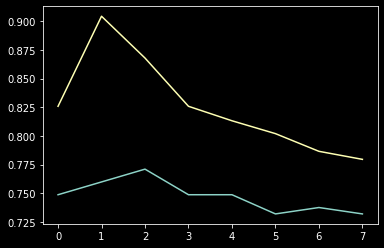

In [187]:
plt.style.use(['dark_background'])
# answer below:
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.show()



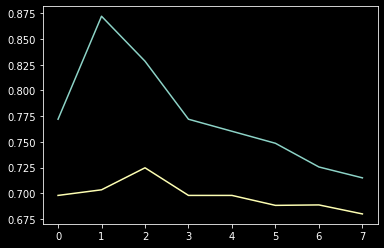

In [188]:
plt.plot(f1_train)
plt.plot(f1_test)
plt.show()

Please comment the results of the plots above

In [189]:
# Add your observations in comments below.
# answer below:
model = KNeighborsClassifier(n_neighbors=3)
#fit the training data
model.fit(X_train, y_train)

#predict the test data.
knn_pred = model.predict(X_test)


In [190]:
#I like to look at the individual cross_val_scores to see if there's a big difference.
score_train = cross_val_score(model, X_train, y_train, cv=5)
score_test = score = cross_val_score(model, X_test, y_test, cv=5)

print("taining: {} \n test: {}".format(score_train, score_test))

taining: [0.76223776 0.74825175 0.76056338 0.77464789 0.73943662] 
 test: [0.69444444 0.58333333 0.75       0.63888889 0.68571429]


In [191]:
cr = classification_report(y_test, knn_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        70

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179

